In [1]:
%pylab inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

Populating the interactive namespace from numpy and matplotlib


In [55]:
aq = pd.read_excel('Documents/Capstone Project/columbus_aq.xlsx')
aq.head()

,JOIN,PM25,PM25_24_hr,O3_ppm,O3_8_hr,weekday
0,2016030614,0.7,NaN,0.045,NaN,0
1,2016030615,0.7,NaN,0.046,NaN,0
2,2016030709,11.2,NaN,0.037,NaN,1
3,2016030710,9.5,NaN,0.044,NaN,1
4,2016031003,10.6,NaN,0.032,NaN,1


In [75]:
weather = pd.read_excel('Documents/Capstone Project/columbus_weather_cleaned.xlsx')
weather.head()

,JOIN,SPD,CLG,VSB,TEMP,DEWP,PCP01,PCP06,PCP24,CLOUDY
0,2016081905,0,70,4.0,73,69,0.14,0.14,0.0,0
1,2016060916,0,722,10.0,87,52,0.00,0.00,0.0,0
2,2016071519,0,50,10.0,91,67,0.00,0.00,0.0,0
3,2016072416,0,49,10.0,91,67,0.00,0.00,0.0,0
4,2016080517,0,65,10.0,89,72,0.00,0.00,0.0,0


In [76]:
merged = aq.merge(weather,how='inner',on='JOIN')
merged.head(50)

,JOIN,PM25,PM25_24_hr,O3_ppm,O3_8_hr,weekday,SPD,CLG,VSB,TEMP,DEWP,PCP01,PCP06,PCP24,CLOUDY
0,2016030614,0.7,NaN,0.045,NaN,0,9,722,10.0,54,33,0.0,0.0,0.0,0
1,2016030615,0.7,NaN,0.046,NaN,0,15,722,10.0,59,27,0.0,0.0,0.0,0
2,2016030709,11.2,NaN,0.037,NaN,1,3,722,10.0,43,36,0.0,0.0,0.0,0
3,2016030710,9.5,NaN,0.044,NaN,1,3,722,10.0,45,37,0.0,0.0,0.0,0
4,2016031003,10.6,NaN,0.032,NaN,1,6,722,10.0,64,53,0.0,0.0,0.0,0
5,2016031110,8.3,NaN,0.031,NaN,1,0,722,10.0,63,61,0.0,0.0,0.0,0
6,2016031111,8.4,NaN,0.036,NaN,1,3,722,10.0,62,61,0.0,0.0,0.0,0
7,2016031112,18.3,NaN,0.042,NaN,1,0,722,10.0,62,61,0.0,0.0,0.0,0
8,2016031115,30.4,NaN,0.051,NaN,1,10,722,10.0,73,61,0.0,0.0,0.0,1
9,2016031116,26.0,NaN,0.047,NaN,1,8,29,10.0,73,61,0.0,0.0,0.0,0


In [77]:
merged.describe()

,JOIN,PM25,PM25_24_hr,O3_ppm,O3_8_hr,weekday,SPD,CLG,VSB,PCP01,PCP06,PCP24,CLOUDY
count,7.817000e+03,7817.000000,7793.000000,5632.000000,5621.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000
mean,2.016280e+09,8.792005,8.777338,0.031560,0.031549,0.707816,5.563899,551.838429,9.706755,0.003615,0.003304,0.003848,0.119611
std,3.873563e+05,8.164737,5.671366,0.014307,0.011788,0.454795,4.333706,294.604809,1.278036,0.032274,0.051678,0.075759,0.324527
min,2.016031e+09,0.200000,1.450000,0.000000,0.000500,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.016061e+09,4.300000,5.520833,0.021000,0.023125,0.000000,3.000000,120.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,2.016092e+09,7.100000,7.575000,0.032000,0.031750,1.000000,6.000000,722.000000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,2.016122e+09,11.100000,10.650000,0.042000,0.040250,1.000000,8.000000,722.000000,10.000000,0.000000,0.000000,0.000000,0.000000
max,2.017033e+09,127.000000,80.462500,0.083000,0.073375,1.000000,31.000000,722.000000,10.000000,0.940000,2.610000,3.790000,1.000000


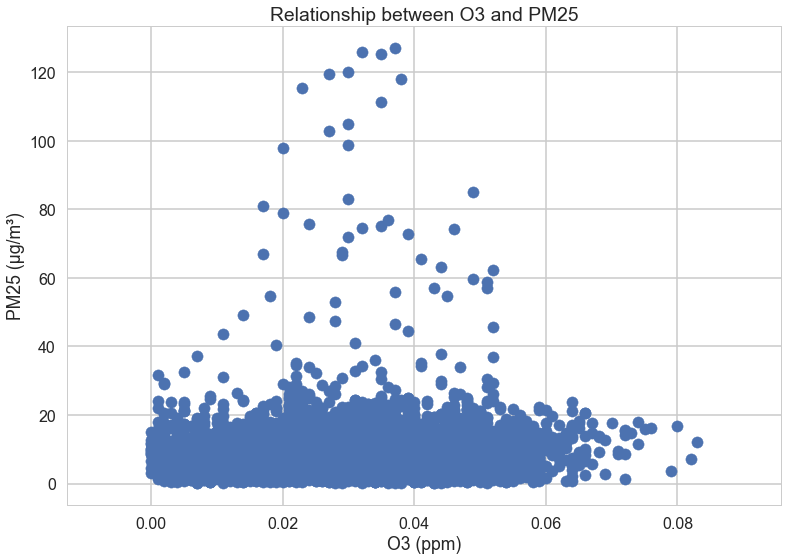

In [78]:
plt.scatter(merged.O3_ppm, merged.PM25)
plt.xlabel("O3 (ppm)")
plt.ylabel("PM25 (µg/m³)")
plt.title("Relationship between O3 and PM25")
#No relationship between O3 and PM concentrations

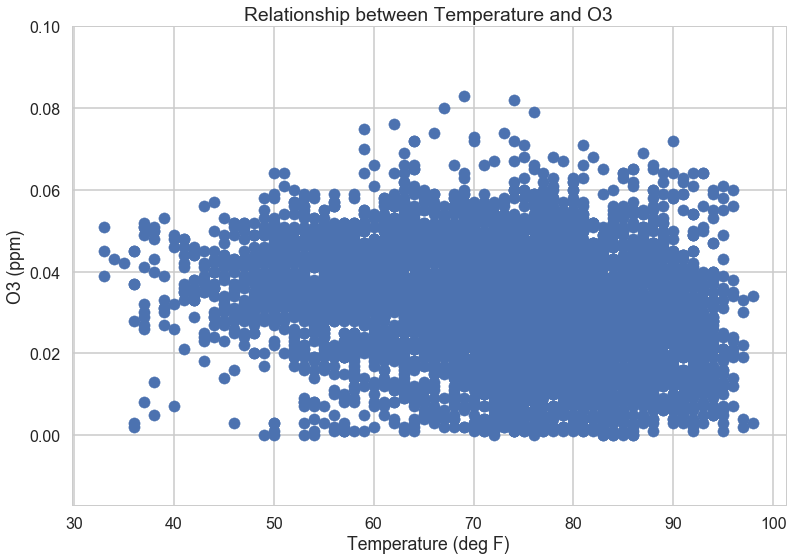

In [79]:
plt.scatter(merged.TEMP, merged.O3_ppm)
plt.xlabel("Temperature (deg F)")
plt.ylabel("O3 (ppm)")
plt.title("Relationship between Temperature and O3")

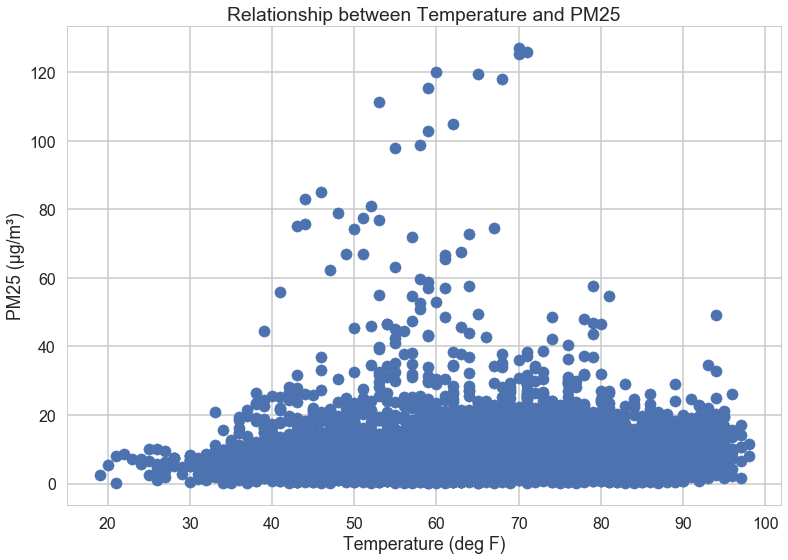

In [80]:
plt.scatter(merged.TEMP, merged.PM25, )
plt.xlabel("Temperature (deg F)")
plt.ylabel("PM25 (µg/m³)")
plt.title("Relationship between Temperature and PM25")

In [81]:
from sklearn.linear_model import LinearRegression
X = merged.drop('PM25', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
lm = LinearRegression()
lm.fit(X[['weekday','TEMP','PCP24','CLOUDY','SPD']], merged.PM25)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
mseFIVE = np.mean((merged.PM25 - lm.predict(X[['weekday','TEMP','PCP24','CLOUDY','SPD']])) ** 2)
print (mseFIVE)

63.20702186461439
